In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [4]:
df = pd.read_csv('phishing.csv', index_col='Index')
df

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1


In [5]:
df.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

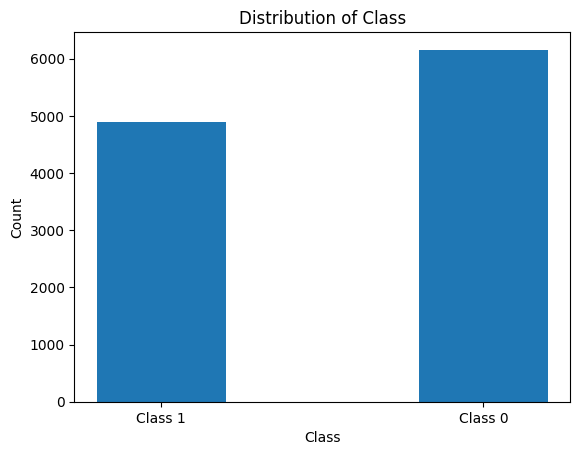

In [6]:
class_counts = df['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(class_counts.index, ['Class 0', 'Class 1'])

plt.show()

In [7]:
is_phishing = df[df['class'] == 1]
not_phishing = df[df['class'] == -1]

is_phishing_upsampled = resample(is_phishing, n_samples=len(not_phishing))

df_balanced = pd.concat([is_phishing_upsampled, not_phishing])
df_balanced['class'].value_counts()

class
 1    4897
-1    4897
Name: count, dtype: int64

In [8]:
x_data = df_balanced.drop(columns=['class'])
y_data = df_balanced['class']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [9]:
params = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport']

In [10]:
model = LogisticRegression()

rfecv = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)

print(f"Optimal number of features : {rfecv.n_features_}")

selected_features = [params[i] for i in range(len(params)) if rfecv.support_[i]]

print("Selected Features:", selected_features)

discarded_features = [params[i] for i in range(len(params)) if not rfecv.support_[i]]

print("Discarded Features:", discarded_features)

NameError: name 'RFECV' is not defined